<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/tf_idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Пример данных
data = {
    'movie_id': [1, 2, 3, 4, 5],
    'description': ['action movie', 'comedy film', 'drama story', 'horror movie', 'romantic film'],
    'genre': ['action', 'comedy', 'drama', 'horror', 'romance']
}

user_preferences = {
    'user_id': [1, 1, 2, 2, 3],
    'movie_id': [1, 2, 3, 4, 5],
    'rating': [5, 4, 3, 2, 5]
}

# Создание DataFrame
movies_df = pd.DataFrame(data)
user_preferences_df = pd.DataFrame(user_preferences)

# Преобразование текстовых описаний в векторы признаков
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(movies_df['description'])

# Обучение модели KNN
knn_model = NearestNeighbors(n_neighbors=3, metric='cosine')
knn_model.fit(X)

# Рекомендация фильмов для пользователя
user_id = 1
user_movies = user_preferences_df[user_preferences_df['user_id'] == user_id]['movie_id']
print(user_movies)
user_movies_descriptions = movies_df[movies_df['movie_id'].isin(user_movies)]['description']
print(user_movies_descriptions)
user_movies_vectors = vectorizer.transform(user_movies_descriptions)
print(user_movies_vectors)
distances, indices = knn_model.kneighbors(user_movies_vectors)
recommended_movies = movies_df.iloc[indices.flatten()]['movie_id'].unique()


print(f"Рекомендованные фильмы для пользователя {user_id}: {recommended_movies}")

0    1
1    2
Name: movie_id, dtype: int64
0    action movie
1     comedy film
Name: description, dtype: object
  (0, 5)	0.6279137616509933
  (0, 0)	0.7782829228046183
  (1, 3)	0.6279137616509933
  (1, 1)	0.7782829228046183
[[0.         0.60572431 1.        ]
 [0.         0.60572431 1.        ]]
Рекомендованные фильмы для пользователя 1: [1 4 3 2 5]


In [8]:
# Рекомендация фильмов для пользователя
user_id = 3
user_movies = user_preferences_df[user_preferences_df['user_id'] == user_id]['movie_id']
user_movies_descriptions = movies_df[movies_df['movie_id'].isin(user_movies)]['description']
user_movies_vectors = vectorizer.transform(user_movies_descriptions)

distances, indices = knn_model.kneighbors(user_movies_vectors)
recommended_movies = movies_df.iloc[indices.flatten()]['movie_id'].unique()

print(f"Рекомендованные фильмы для пользователя {user_id}: {recommended_movies}")

Рекомендованные фильмы для пользователя 3: [5 2 3]


In [4]:
for i in X:
    print(i)

  (0, 5)	0.6279137616509933
  (0, 0)	0.7782829228046183
  (0, 3)	0.6279137616509933
  (0, 1)	0.7782829228046183
  (0, 7)	0.7071067811865475
  (0, 2)	0.7071067811865475
  (0, 4)	0.7782829228046183
  (0, 5)	0.6279137616509933
  (0, 6)	0.7782829228046183
  (0, 3)	0.6279137616509933


In [5]:
movies_df['description']

,description
0,action movie
1,comedy film
2,drama story
3,horror movie
4,romantic film


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Пример данных
data = {
    'movie_id': [1, 2, 3, 4, 5],
    'description': ['action movie', 'comedy film', 'drama story', 'horror movie', 'romantic film'],
    'genre': ['action', 'comedy', 'drama', 'horror', 'romance']
}

user_preferences = {
    'user_id': [1, 1, 2, 2, 3],
    'movie_id': [1, 2, 3, 4, 5],
    'rating': [5, 4, 3, 2, 5]
}

# Создание DataFrame
movies_df = pd.DataFrame(data)
user_preferences_df = pd.DataFrame(user_preferences)

# Преобразование текстовых описаний в векторы признаков
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(movies_df['description'])

# Подготовка данных для обучения
y = user_preferences_df.set_index('movie_id')['rating'].to_dict()
y_train = [y[movie_id] for movie_id in movies_df['movie_id']]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

# Обучение модели SVM
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Предсказание оценок
y_pred = svm_model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Рекомендация фильмов для пользователя
user_id = 1
user_movies = user_preferences_df[user_preferences_df['user_id'] == user_id]['movie_id']
user_movies_descriptions = movies_df[movies_df['movie_id'].isin(user_movies)]['description']
user_movies_vectors = vectorizer.transform(user_movies_descriptions)

predicted_ratings = svm_model.predict(user_movies_vectors)
recommended_movies = movies_df.iloc[predicted_ratings.argsort()[-3:]]['movie_id'].values

print(f"Рекомендованные фильмы для пользователя {user_id}: {recommended_movies}")

Mean Squared Error: 0.12591719029984247
Рекомендованные фильмы для пользователя 1: [2 1]


In [17]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Пример данных
data = {
    'movie_id': [1, 2, 3, 4, 5],
    'description': ['action movie', 'comedy film', 'drama story', 'horror movie', 'comedy movie'],
    'genre': ['action', 'comedy', 'drama', 'horror', 'comedy']
}

user_preferences = {
    'user_id': [1, 1, 2, 2, 3],
    'movie_id': [1, 2, 3, 4, 5],
    'rating': [5, 4, 3, 2, 5]
}

# Создание DataFrame
movies_df = pd.DataFrame(data)
user_preferences_df = pd.DataFrame(user_preferences)

# Преобразование текстовых описаний в векторы признаков
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(movies_df['description'])

# Подготовка данных для обучения
y = user_preferences_df.set_index('movie_id')['rating'].to_dict()
y_train = [y[movie_id] for movie_id in movies_df['movie_id']]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)
print(y_train, X_train,'ff')
# Обучение модели CatBoost
catboost_model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE')
catboost_model.fit(X_train, y_train)

# Предсказание оценок
y_pred = catboost_model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Рекомендация фильмов для пользователя
user_id = 1
user_movies = user_preferences_df[user_preferences_df['user_id'] == user_id]['movie_id']
user_movies_descriptions = movies_df[movies_df['movie_id'].isin(user_movies)]['description']
user_movies_vectors = vectorizer.transform(user_movies_descriptions)

predicted_ratings = catboost_model.predict(user_movies_vectors)
recommended_movies = movies_df.iloc[predicted_ratings.argsort()[-3:]]['movie_id'].values

print(f"Рекомендованные фильмы для пользователя {user_id}: {recommended_movies}")

[5, 3, 5, 2]   (0, 1)	0.7694470729725092
  (0, 5)	0.6387105775654869
  (1, 6)	0.7071067811865475
  (1, 2)	0.7071067811865475
  (2, 5)	0.5564505207186616
  (2, 0)	0.830880748357988
  (3, 4)	0.830880748357988
  (3, 5)	0.5564505207186616 ff
0:	learn: 1.2575786	total: 231us	remaining: 22.9ms
1:	learn: 1.2261391	total: 2.96ms	remaining: 145ms
2:	learn: 1.1954856	total: 5.4ms	remaining: 175ms
3:	learn: 1.1655985	total: 5.64ms	remaining: 135ms
4:	learn: 1.1544093	total: 5.99ms	remaining: 114ms
5:	learn: 1.1255491	total: 6.24ms	remaining: 97.8ms
6:	learn: 1.0896738	total: 6.6ms	remaining: 87.7ms
7:	learn: 1.0624320	total: 6.81ms	remaining: 78.3ms
8:	learn: 1.0286915	total: 7.05ms	remaining: 71.3ms
9:	learn: 0.9961412	total: 7.31ms	remaining: 65.8ms
10:	learn: 0.9712377	total: 7.66ms	remaining: 62ms
11:	learn: 0.9469568	total: 8.15ms	remaining: 59.7ms
12:	learn: 0.9232829	total: 8.5ms	remaining: 56.9ms
13:	learn: 0.8941742	total: 8.76ms	remaining: 53.8ms
14:	learn: 0.8718199	total: 9.1ms	remain

Vector for 'cat':
 [ 8.13227147e-03 -4.45733406e-03 -1.06835726e-03  1.00636482e-03
 -1.91113955e-04  1.14817743e-03  6.11386076e-03 -2.02715401e-05
 -3.24596534e-03 -1.51072862e-03  5.89729892e-03  1.51410222e-03
 -7.24261976e-04  9.33324732e-03 -4.92128357e-03 -8.38409644e-04
  9.17541143e-03  6.74942741e-03  1.50285603e-03 -8.88256077e-03
  1.14874600e-03 -2.28825561e-03  9.36823711e-03  1.20992784e-03
  1.49006362e-03  2.40640994e-03 -1.83600665e-03 -4.99963388e-03
  2.32429506e-04 -2.01418041e-03  6.60093315e-03  8.94012302e-03
 -6.74754381e-04  2.97701475e-03 -6.10765442e-03  1.69932481e-03
 -6.92623248e-03 -8.69402662e-03 -5.90020278e-03 -8.95647518e-03
  7.27759488e-03 -5.77203138e-03  8.27635173e-03 -7.24354526e-03
  3.42167495e-03  9.67499893e-03 -7.78544787e-03 -9.94505733e-03
 -4.32914635e-03 -2.68313056e-03 -2.71289347e-04 -8.83155130e-03
 -8.61755759e-03  2.80021061e-03 -8.20640661e-03 -9.06933658e-03
 -2.34046578e-03 -8.63180775e-03 -7.05664977e-03 -8.40115082e-03
 -3.01

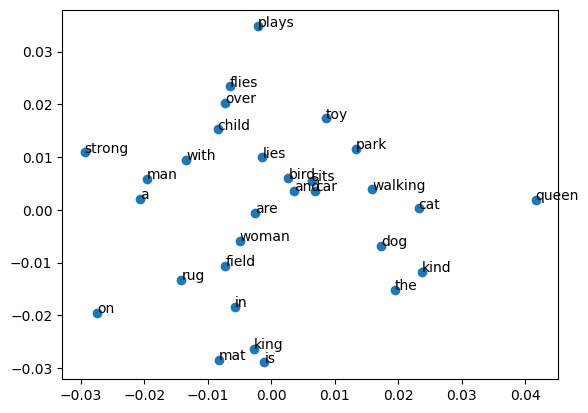

In [30]:
# Импортируем необходимые библиотеки
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Пример расширенного набора предложений
sentences = [
    ["the", "cat", "sits", "on", "the", "mat"],
    ["the", "dog", "lies", "on", "the", "rug"],
    ["the", "bird", "flies", "over", "the", "field"],
    ["a", "man", "and", "a", "woman", "are", "walking", "in", "the", "park"],
    ["the", "child", "plays", "with", "a", "toy", "car"],
    ["king", "is", "a", "man"],
    ["queen", "is", "a", "woman"],
    ["man", "is", "strong"],
    ["woman", "is", "kind"]
]

# Обучаем модель Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Получаем векторные представления слов
word_vector = model.wv['cat']
print("Vector for 'cat':\n", word_vector)

# Пример нахождения аналогий: король - мужчина + женщина = ?
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'])
print("\nResult of analogy 'king' - 'man' + 'woman':", result[0][0])

# Визуализация векторных представлений слов
words = list(model.wv.index_to_key)
vectors = model.wv[words]

# Уменьшаем размерность до 2D с помощью PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Рисуем слова на 2D графике
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()